# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [2]:
#import dataset
import pandas as pd
import numpy as np

data = pd.read_excel('Online Retail.xlsx')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
#clean data
print(data.count())
print(data.isnull().sum())
print(data['CustomerID'].describe())

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64


In [20]:
#clean data
df = data.copy()
df.dropna()
df.drop_duplicates()
df['Country'].groupby(df['Description']).value_counts()

Description                     Country       
20713                           United Kingdom      1
 4 PURPLE FLOCK DINNER CANDLES  United Kingdom     40
                                EIRE                1
 50'S CHRISTMAS GIFT BAG LARGE  United Kingdom    119
                                Germany             5
                                                 ... 
wrongly marked carton 22804     United Kingdom      1
wrongly marked. 23343 in box    United Kingdom      1
wrongly sold (22719) barcode    United Kingdom      1
wrongly sold as sets            United Kingdom      1
wrongly sold sets               United Kingdom      1
Name: Country, Length: 20176, dtype: int64

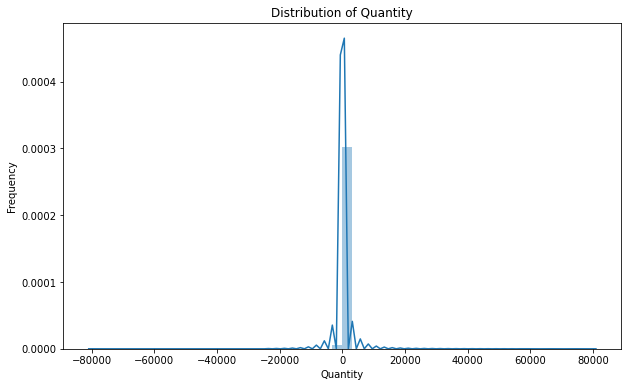

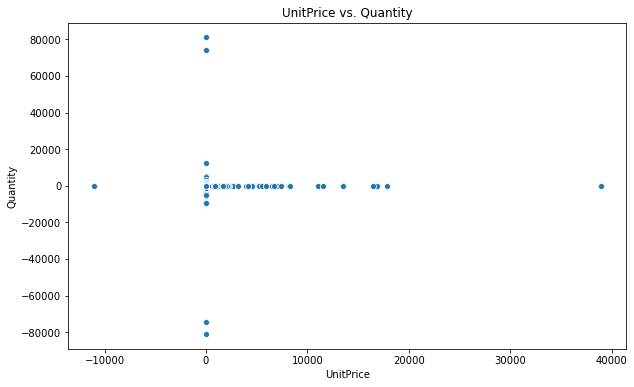

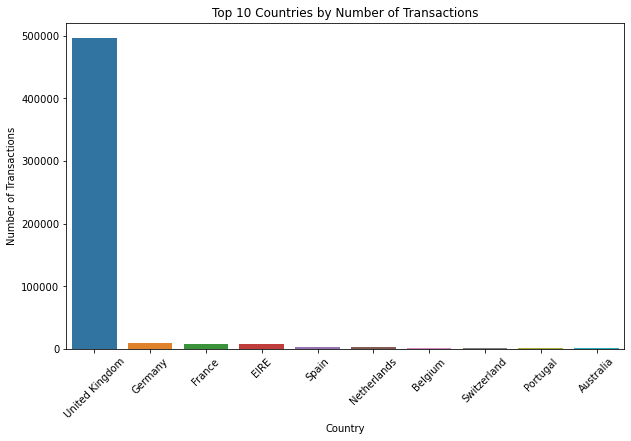

In [23]:
#plot
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(10, 6))
sns.distplot(df['Quantity'], bins=50)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of UnitPrice vs. Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=df)
plt.title('UnitPrice vs. Quantity')
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.show()

# Bar plot for top countries by sales
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

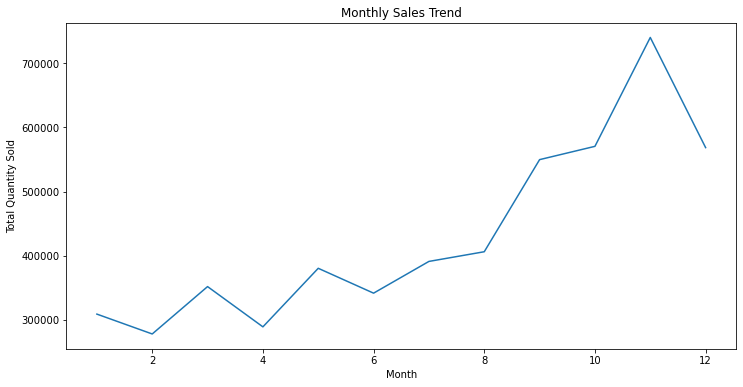

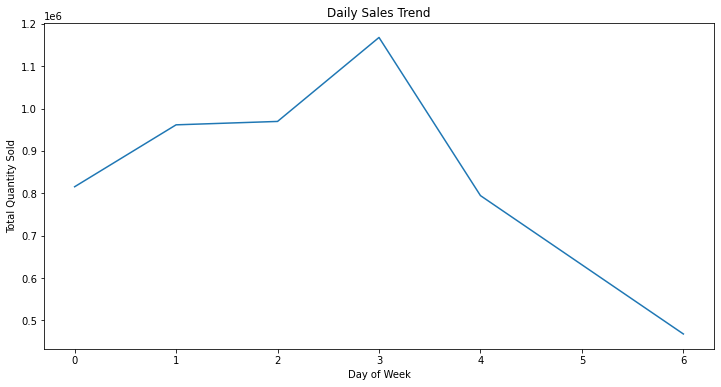

In [24]:
#sales trend
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and day of week
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Group by month and day of week to find sales trends
monthly_sales = df.groupby('Month')['Quantity'].sum()
daily_sales = df.groupby('DayOfWeek')['Quantity'].sum()

# Line plots for sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line')
plt.title('Daily Sales Trend')
plt.xlabel('Day of Week')
plt.ylabel('Total Quantity Sold')
plt.show()

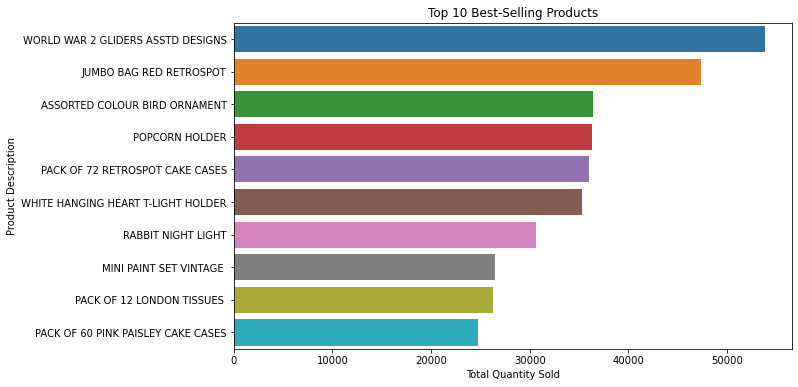

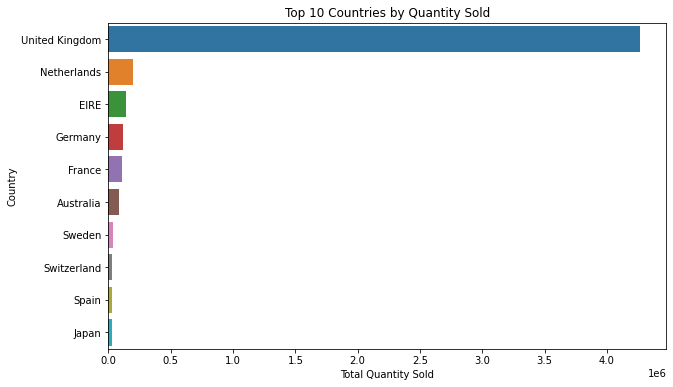

In [25]:
# Top-selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

# Sales by country
sales_by_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_country.values, y=sales_by_country.index)
plt.title('Top 10 Countries by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')
plt.show()

In [33]:
# Detect outliers in Quantity and UnitPrice using IQR method
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Quantity'] < (Q1 - 1.5 * IQR)) | (df['Quantity'] > (Q3 + 1.5 * IQR))]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2


In [35]:
import datetime as dt
df['TotalSum'] = df['Quantity'] * df['UnitPrice']

df.head()
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
rfm_table = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSum': 'sum'
}).reset_index()

# Rename columns for better readability
rfm_table.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Filter out non-positive Monetary values
rfm_table = rfm_table[rfm_table['Monetary'] > 0]

rfm_table.head()

,CustomerID,Recency,Frequency,Monetary
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
5,12352.0,36,11,1545.41


In [36]:
# Assign scores for Recency, Frequency, and Monetary
rfm_table['R_Score'] = pd.qcut(rfm_table['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_table['F_Score'] = pd.qcut(rfm_table['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_table['M_Score'] = pd.qcut(rfm_table['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores
rfm_table['RFM_Segment'] = rfm_table['R_Score'].astype(str) + rfm_table['F_Score'].astype(str) + rfm_table['M_Score'].astype(str)
rfm_table['RFM_Score'] = rfm_table[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

rfm_table.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
1,12347.0,2,7,4310.00,5,4,5,545,14.0
2,12348.0,75,4,1797.24,2,3,4,234,9.0
3,12349.0,19,1,1757.55,4,1,4,414,9.0
4,12350.0,310,1,334.40,1,1,2,112,4.0
5,12352.0,36,11,1545.41,3,5,4,354,12.0


In [37]:
# Define RFM segments
def rfm_segment(df):
    if df['RFM_Score'] >= 9:
        return 'Best Customers'
    elif df['RFM_Score'] >= 7:
        return 'Loyal Customers'
    elif df['RFM_Score'] >= 5:
        return 'Potential Loyalists'
    elif df['RFM_Score'] >= 4:
        return 'Recent Customers'
    elif df['RFM_Score'] >= 3:
        return 'Promising'
    elif df['RFM_Score'] >= 2:
        return 'Need Attention'
    else:
        return 'At Risk'

rfm_table['Segment'] = rfm_table.apply(rfm_segment, axis=1)

# Display segment counts
segment_counts = rfm_table['Segment'].value_counts()
segment_counts

Best Customers         2248
Loyal Customers         775
Potential Loyalists     769
Recent Customers        339
Promising               191
Name: Segment, dtype: int64